#### In this notebook we load the preprocessed datasaset from the notebook "Preprocessing2" and see how different models perform.

In ModelComparison0.ipynb we noticed that after Oversampling the ositive instances of the dataset all the models performed better.
Here we'll perform directly Oversampling and then compare the models.

This decision is made in order to make the notebook not too long but more important because, always in  ModelComparison0.ipynb,
we noticed that the performance of the classifiers without performing Oversampling where pretty unsatisfying because of the fact that the original distribution is very skewed ( only the 6% of instances are positive).

As before, we change the distribution only in the trainig set and we keep the original distribution in the validation and test sets.

Finally, I decided to perform Oversampling and not SubSampling to not reduce the dimension of the dataset we are taking in consideration.

In [1]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")


from sklearn.model_selection import cross_val_score
import sklearn.metrics as mt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [2]:
#Load the dataset from Preprocessinc2.ipynb
print("Load the dataset from Preprocessinc2.ipynb...")
dataset = pd.read_csv("./BagOfWordDataSet2.csv")

Load the dataset from Preprocessinc2.ipynb...


In [3]:
dataset.head()

,Unnamed: 0,aaa,aadhaar,aadhar,aakash,aalto,aaron,aathar,abathroom,abbi,...,zookeep,zoolog,zoologist,zoroastrian,zstsn,zubeen,zuckerberg,zuni,zusak,TARGET
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset = dataset.drop('Unnamed: 0', 1)
dataset.head()

,aaa,aadhaar,aadhar,aakash,aalto,aaron,aathar,abathroom,abbi,abbrevi,...,zookeep,zoolog,zoologist,zoroastrian,zstsn,zubeen,zuckerberg,zuni,zusak,TARGET
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = dataset['TARGET']
variables = dataset.columns[dataset.columns!='TARGET']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [6]:
X = dataset[variables]
X.head()

,aaa,aadhaar,aadhar,aakash,aalto,aaron,aathar,abathroom,abbi,abbrevi,...,zone,zookeep,zoolog,zoologist,zoroastrian,zstsn,zubeen,zuckerberg,zuni,zusak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#splitting train and test set in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123, stratify = y)

We will need also a validation set for parameters tuning:

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=123, stratify = y_train)

#### Now we can perform Oversampling on the training set:

In [9]:
from pandas import *
df_train= concat([X_train, y_train], axis=1, sort=False)
df_train.head()

,aaa,aadhaar,aadhar,aakash,aalto,aaron,aathar,abathroom,abbi,abbrevi,...,zookeep,zoolog,zoologist,zoroastrian,zstsn,zubeen,zuckerberg,zuni,zusak,TARGET
6374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Class count
count_class_0, count_class_1 = df_train.TARGET.value_counts()
print("Number of negative instances:")
print(count_class_0)
print("Number of positive instances:")

print(count_class_1)

print("percentange of positive: " + str(round(count_class_1*100/(count_class_0 + count_class_1),2)))

Number of negative instances:
7597
Number of positive instances:
503
percentange of positive: 6.21


In [11]:
# Divide by class
df_class_0 = df_train[df_train['TARGET'] == 0]
df_class_1 = df_train[df_train['TARGET'] == 1]

In [12]:
print("performing Oversampling...")
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

count_class_0, count_class_1 = train_over.TARGET.value_counts()
print("Number of negative instances:")

print(count_class_0)
print("Number of positive instances:")

print(count_class_1)

print("percentange of positive: " + str(round(count_class_1*100/(count_class_0 + count_class_1),2)))

performing Oversampling...
Number of negative instances:
7597
Number of positive instances:
7597
percentange of positive: 50.0


In [13]:
#split again in X_train, y_train
y_train = train_over['TARGET']
variables = train_over.columns[dataset.columns!='TARGET']
X_train = train_over[variables]

## Evaluating Classification - Accuracy
Accuracy is the most known and most widely used measure of classification performance. It measure the percentage of correct classification achieved by the model.

$accuracy = \frac{number of correclty classified examples}{number of examples}$

## Confusion Matrix
Accuracy evaluates the percentage of correct predictions but not the errors are equal. To have a better sense of how a classifier model performs the confusion matrix is usually examined. The confusion matrix includes

- <b>the true positives,</b> the number of examples labeled as positives and prediceted as positives
- <b>the true negatives,</b> the number of examples labeled as negatives and prediceted as negatives
- <b>the false positives,</b> the number of examples labeled as negatives and prediceted as positives
- <b>the false negatives,</b> the number of examples labeled as positives and prediceted as negatives

The confusion matrix is typically shown as,


|  | Predicted Positive | Predicted Negative |
|-----------------:|:------------------:|:------------------:|
| Labeled Positive | TP | FN |
| Labeled Negative | FP | TN | 

We can compute the confusion matrix for the three models we developed.

In [14]:
def PrintConfusionMatrix(model, true_y, predicted_y, positive=1, negative=-1):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])


In [15]:
def F1Score ( precision, recall):
    f1 = 2 * precision * recall / (precision + recall)
    return f1

## Precision and Recall
Precision and recall are alternative measures to plain accuracy introduced in the area of information retrieval and search engine. Precision focuses on the percentage of correctly classified positive examples or in the information retrieval context represents the percentage of actually good documents that have been shown as a result. Recall focuses on the percentage of positively classified examples with respect to the number of existing good documents or in the information retrieval context, recall represents the percentage of good documents shown with respect to the existing ones.

$precision = \frac{TP}{TP+FP}$

$recall = \frac{TP}{TP+FN}$

Precision and Recall will be usefull also in this scenario where the positive instancies are much less than the negative ones.

Positive instances account for about the 6% of the dataset.
This means that a classifier that predicts everything as negative will have an accuracy around 94% that is pretty high but will not be useful because the goal of the task is to correctly find the positive instances.

That's the reason why we'll check also the values of precision and recall.

Finally we will consider also the F1-score:
$ F1 = \frac{2 * Precison * Recall}{Precison + Recall}$

# Naive Bayes 

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
model = MultinomialNB().fit(X_train, y_train) 

In [18]:
print()
print("Naive Bayes")
#Train Accuracy
predicted = model.predict(X_train)
print("Train Accuracy:")
print(np.mean(predicted == y_train)) 

#Test Accuracy
predicted = model.predict(X_test)
print("Test Accuracy:")
print(np.mean(predicted == y_test)) 


Naive Bayes
Train Accuracy:
0.9416216927734632
Test Accuracy:
0.839


In [19]:
print("Confusion Matrix - Naive Bayes ")
PrintConfusionMatrix(model, y_test, predicted)

Confusion Matrix - Naive Bayes 
	0	1
0	 795 	 143
1	 18 	 44


In [20]:
print("Precision %3.2f" % precision_score(y_test,predicted))
print("Recall    %3.2f" % recall_score(y_test,predicted))
print("F1    %3.2f" % F1Score( precision_score(y_test,predicted), recall_score(y_test,predicted)))

Precision 0.24
Recall    0.71
F1    0.35


# Logistic Regression


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
print()
print("Logistic Regression:")
ln = LogisticRegression(solver = 'liblinear')
ln.fit(X_train, y_train);
predictions = ln.predict(X_train)
# check  training accuracy
import sklearn.metrics as mt
acc = mt.accuracy_score(predictions,y_train)
print( "Training Accuracy: " + str(acc))


Logistic Regression:
Training Accuracy: 0.9884164801895485


In [23]:
from sklearn.model_selection import cross_val_score
predictions = ln.predict(X_test)

acc = mt.accuracy_score(predictions,y_test)
print( "Test Accuracy on original distribution: " + str(acc))
scores = cross_val_score(ln, X_train, y_train, cv=10)
#print(scores)
print("Test Accuracy with CV: " + str(scores.mean()))

Test Accuracy on original distribution: 0.926
Test Accuracy with CV: 0.9749904652936688


In [26]:
ln.fit(X_train, y_train);
predictions = ln.predict(X_test)
print("Confusion Matrix - Logistic Regression")
PrintConfusionMatrix(ln, y_test, predictions)

Confusion Matrix - Logistic Regression
	0	1
0	 892 	 46
1	 30 	 32


In [27]:
print("Precision %3.2f" % precision_score(y_test,predictions))
print("Recall    %3.2f" % recall_score(y_test,predictions))
print("F1    %3.2f" % F1Score( precision_score(y_test,predicted), recall_score(y_test,predicted)))

Precision 0.41
Recall    0.52
F1    0.36


# Ridge

In [28]:
from sklearn.linear_model import RidgeClassifier

In [29]:
print()
print("Ridge:")
alphaValue = [0.1,1,10,20,40,80,160,250]
accValues = []
f1Values = []

for alph in alphaValue:
    
    #Train
    clf = RidgeClassifier(alpha=alph)
    clf.fit(X_train, y_train)
    print("alpha: " + str(alph))
    print()
    predictions = clf.predict(X_train) 
    acc = mt.accuracy_score(predictions,y_train)
    print( "Training Accuracy: " + str(acc))
    
    #Test
    predictions = clf.predict(X_val)
    accTest = mt.accuracy_score(predictions,y_val)
    accValues.append(accTest)
    print("Test Accuracy: " + str(accTest))
    
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1score)
    print("F1    %3.2f" % f1score )

    print()
    

alpha: 0.1

Training Accuracy: 0.9961827036988284
Test Accuracy: 0.8988888888888888
Precision on test 0.29
Recall on test  0.43
F1    0.35

alpha: 1

Training Accuracy: 0.9944056864551797
Test Accuracy: 0.9211111111111111
Precision on test 0.38
Recall on test  0.41
F1    0.39

alpha: 10

Training Accuracy: 0.9849282611557194
Test Accuracy: 0.9255555555555556
Precision on test 0.42
Recall on test  0.48
F1    0.45

alpha: 20

Training Accuracy: 0.9815716730288272
Test Accuracy: 0.9233333333333333
Precision on test 0.40
Recall on test  0.48
F1    0.44

alpha: 40

Training Accuracy: 0.9697248914045018
Test Accuracy: 0.9277777777777778
Precision on test 0.44
Recall on test  0.59
F1    0.50

alpha: 80

Training Accuracy: 0.9538633671185994
Test Accuracy: 0.9255555555555556
Precision on test 0.43
Recall on test  0.61
F1    0.50

alpha: 160

Training Accuracy: 0.9208240094774253
Test Accuracy: 0.9133333333333333
Precision on test 0.38
Recall on test  0.59
F1    0.46

alpha: 250

Training Accur

In [30]:
    
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

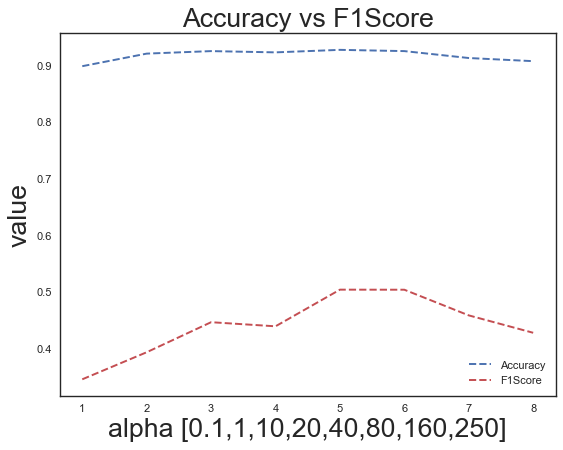

In [31]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('alpha [0.1,1,10,20,40,80,160,250]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

## Lasso

In [32]:
from sklearn import linear_model


In [33]:
print()
print("Lasso:")
alphaValue = [0.0001, 0.0005, 0.001, 0.01,0.1]
accValues = []
f1Values = []

for alph in alphaValue:

    #Train
    clf = linear_model.Lasso(alpha=alph)
    clf.fit(X_train,y_train);
    predictions = clf.predict(X_train)
    for i in range(0, predictions.shape[0]):
        if predictions[i] >= 0.5:
            predictions[i]=1
        else:
            predictions[i]=0
            
    print("alpha: " + str(alph))
    print("Train Accuracy:")
    print(mt.accuracy_score(predictions,y_train))
    
    #Test
    predictions = clf.predict(X_val)
    for i in range(0, predictions.shape[0]):
        if predictions[i] >= 0.5:
            predictions[i]=1
        else:
            predictions[i]=0
            
    print("Test Accuracy:")
    acc =mt.accuracy_score(predictions,y_val)
    print(acc)
    accValues.append(acc)
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score =  F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" % f1Score)

    print()

alpha: 0.0001
Train Accuracy:
0.9799921021455837
Test Accuracy:
0.9133333333333333
Precision on test 0.35
Recall on test  0.46
F1    0.40

alpha: 0.0005
Train Accuracy:
0.917730683164407
Test Accuracy:
0.9122222222222223
Precision on test 0.37
Recall on test  0.57
F1    0.45

alpha: 0.001
Train Accuracy:
0.8494800579175991
Test Accuracy:
0.8988888888888888
Precision on test 0.33
Recall on test  0.61
F1    0.43

alpha: 0.01
Train Accuracy:
0.66565749638015
Test Accuracy:
0.9077777777777778
Precision on test 0.27
Recall on test  0.29
F1    0.28

alpha: 0.1
Train Accuracy:
0.5
Test Accuracy:
0.06222222222222222
Precision on test 0.06
Recall on test  1.00
F1    0.12



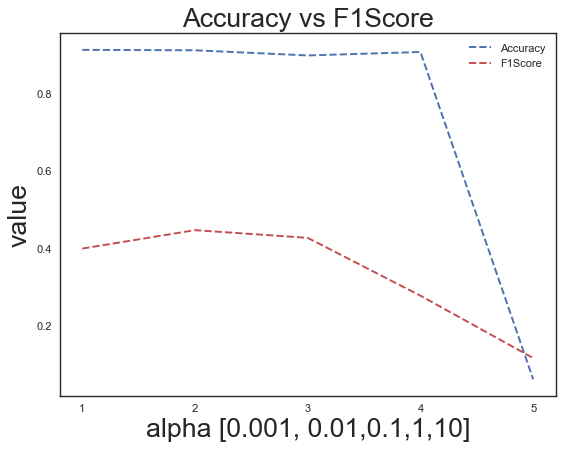

In [34]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('alpha [0.001, 0.01,0.1,1,10]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [36]:
print()
print("KNN:")
k_range = list(range(1, 30))
accValues = []
f1Values = []
for k in k_range:
    if (k%2 == 1):
        print("k = " + str(k))
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train);
        # fit the model with data
        predictions = knn.predict(X_val)
        
        print("Test Accuracy:")
        acc = mt.accuracy_score(predictions,y_val)
        accValues.append(acc)
        print(acc)
        print("Precision on test %3.2f" % precision_score(y_val,predictions))
        print("Recall on test  %3.2f" % recall_score(y_val,predictions))
        f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
        f1Values.append(f1Score)
        print("F1    %3.2f" %  f1Score)

        print()


k = 1
Test Accuracy:
0.9266666666666666
Precision on test 0.22
Recall on test  0.07
F1    0.11

k = 3
Test Accuracy:
0.9211111111111111
Precision on test 0.20
Recall on test  0.09
F1    0.12

k = 5
Test Accuracy:
0.92
Precision on test 0.21
Recall on test  0.11
F1    0.14

k = 7
Test Accuracy:
0.92
Precision on test 0.25
Recall on test  0.14
F1    0.18

k = 9
Test Accuracy:
0.9177777777777778
Precision on test 0.25
Recall on test  0.16
F1    0.20

k = 11
Test Accuracy:
0.9155555555555556
Precision on test 0.25
Recall on test  0.18
F1    0.21

k = 13
Test Accuracy:
0.9166666666666666
Precision on test 0.27
Recall on test  0.20
F1    0.23

k = 15
Test Accuracy:
0.9166666666666666
Precision on test 0.27
Recall on test  0.20
F1    0.23

k = 17
Test Accuracy:
0.9155555555555556
Precision on test 0.26
Recall on test  0.20
F1    0.22

k = 19
Test Accuracy:
0.9144444444444444
Precision on test 0.24
Recall on test  0.18
F1    0.21

k = 21
Test Accuracy:
0.9144444444444444
Precision on test 0.24

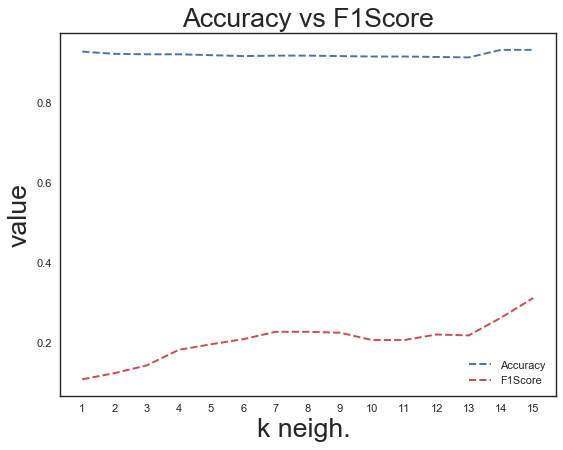

In [37]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('k neigh. ')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# Decision Trees

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
print()
print("Decision Tree:")
depthValues =  [5,10,15,20,30,40,50,100,150,200]

accValues = []
f1Values = []

for depth in depthValues:
    print("max_depth: " + str(depth))
    dt = tree.DecisionTreeClassifier(max_depth = depth, criterion = 'entropy')
    dt.fit(X_train,y_train);
    #Train
    predictions = dt.predict(X_train)
    acc = mt.accuracy_score(predictions,y_train)
    accValues.append(acc)
    print( "Training Accuracy: " + str(acc))        
    
    #Test
    predictions = dt.predict(X_val)
    print("Test Accuracy:")
    print(mt.accuracy_score(predictions,y_val))
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" %  f1Score)
    print()

max_depth: 5
Training Accuracy: 0.6655258654732131
Test Accuracy:
0.9111111111111111
Precision on test 0.29
Recall on test  0.29
F1    0.29

max_depth: 10
Training Accuracy: 0.7169935500855601
Test Accuracy:
0.8977777777777778
Precision on test 0.28
Recall on test  0.39
F1    0.32

max_depth: 15
Training Accuracy: 0.7566144530735817
Test Accuracy:
0.9166666666666666
Precision on test 0.37
Recall on test  0.48
F1    0.42

max_depth: 20
Training Accuracy: 0.7916940897722785
Test Accuracy:
0.9177777777777778
Precision on test 0.38
Recall on test  0.50
F1    0.43

max_depth: 30
Training Accuracy: 0.8554034487297617
Test Accuracy:
0.9355555555555556
Precision on test 0.48
Recall on test  0.43
F1    0.45

max_depth: 40
Training Accuracy: 0.8931157035671976
Test Accuracy:
0.9388888888888889
Precision on test 0.51
Recall on test  0.46
F1    0.49

max_depth: 50
Training Accuracy: 0.9190469922337765
Test Accuracy:
0.9355555555555556
Precision on test 0.48
Recall on test  0.45
F1    0.46

max_dep

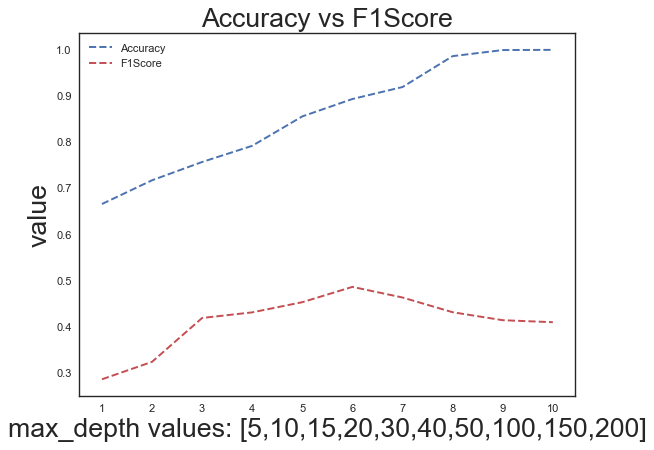

In [40]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,len(depthValues)+1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('max_depth values: [5,10,15,20,30,40,50,100,150,200]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

## Random Forest

In [41]:
# Import Random Forest model and fit it to the train set
from sklearn.ensemble import RandomForestClassifier

In [42]:
print()
print("Random Forest:")
estimatorsValues= [10,20,40,80,100,150]
max_depthValues = [5,10,20,30,50]
accValues = []
f1Values = []

for estimator in estimatorsValues:
    for depth in max_depthValues:
        
        #Train
        print("#estimators: " + str(estimator) + "  max_depth: " + str(depth))
        rf = RandomForestClassifier(n_estimators = estimator, max_depth = depth, criterion = "gini")
        rf.fit(X_train, y_train);

        predictions = rf.predict(X_train)
        # check accuracy
        trainacc = mt.accuracy_score(predictions,y_train)
        print("Training Accuracy: " + str(trainacc))
        
        #Test
        predictions = rf.predict(X_val)
        print("Test Accuracy:")
        acc =mt.accuracy_score(predictions,y_val)
        accValues.append(acc)
        print(acc)
        print("Precision on test %3.2f" % precision_score(y_val,predictions))
        print("Recall on test  %3.2f" % recall_score(y_val,predictions))
        print("Recall on test  %3.2f" % recall_score(y_val,predictions))
        f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
        f1Values.append(f1Score)
        print("F1    %3.2f" %  f1Score)
        print()
        

#estimators: 10  max_depth: 5
Training Accuracy: 0.7171909964459655
Test Accuracy:
0.8855555555555555
Precision on test 0.22
Recall on test  0.34
Recall on test  0.34
F1    0.27

#estimators: 10  max_depth: 10
Training Accuracy: 0.7831380808213768
Test Accuracy:
0.8888888888888888
Precision on test 0.25
Recall on test  0.39
Recall on test  0.39
F1    0.31

#estimators: 10  max_depth: 20
Training Accuracy: 0.8101882321969198
Test Accuracy:
0.9077777777777778
Precision on test 0.32
Recall on test  0.41
Recall on test  0.41
F1    0.36

#estimators: 10  max_depth: 30
Training Accuracy: 0.8764643938396736
Test Accuracy:
0.8944444444444445
Precision on test 0.24
Recall on test  0.32
Recall on test  0.32
F1    0.27

#estimators: 10  max_depth: 50
Training Accuracy: 0.890812162695801
Test Accuracy:
0.9377777777777778
Precision on test 0.50
Recall on test  0.32
Recall on test  0.32
F1    0.39

#estimators: 20  max_depth: 5
Training Accuracy: 0.7897854416216927
Test Accuracy:
0.8611111111111112


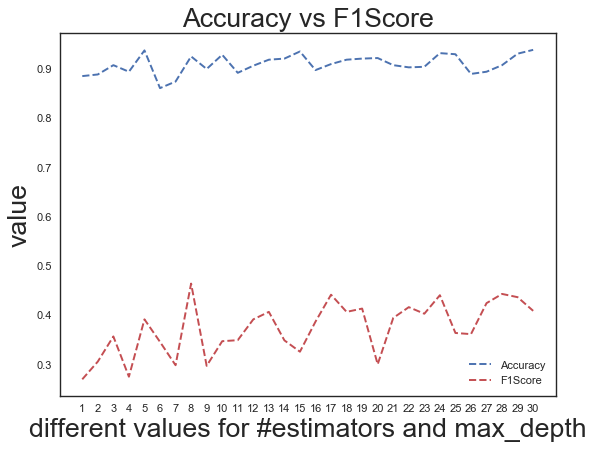

In [43]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,(len(estimatorsValues) * len(max_depthValues)+1)))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('different values for #estimators and max_depth')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# SVM

from sklearn.svm import SVC
CValues = [0.1, 1, 5, 10, 20, 40, 70]
accValues = []
f1Values = []

for c in CValues:
    print("C = " + str(c))
    svmC = SVC(gamma= 'auto', C = c, kernel='rbf')
    svmC.fit(X_train, y_train)
    predictions = svmC.predict(X_train)
    # check accuracy
    trainacc = mt.accuracy_score(predictions,y_train)
    print("Training Accuracy: " + str(trainacc))
        
    #Test
    predictions = svmC.predict(X_val)
    print("Test Accuracy:")
    acc =mt.accuracy_score(predictions,y_val)
    accValues.append(acc)
    print(acc)
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" %  f1Score)
    print()

plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,(len(estimatorsValues) * len(max_depthValues)+1)))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('C = [0.1, 1, 5, 10, 20, 40, 70]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()